In [1]:
import scprep
import phate
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from local_corex import LinearCorex, partition_data
from local_corex.utils import data as du, plotting as pu

from torchvision.datasets import MNIST

mnist_train = MNIST('/yunity/tkerby2/local_corex_private/data', train=True, download=True)
mnist_test = MNIST('/yunity/tkerby2/local_corex_private/data', train=False, download=True)

train_labels = mnist_train.targets.numpy()
mnist_train = mnist_train.data.numpy()
mnist_train = mnist_train.reshape(mnist_train.shape[0], -1)  # Flatten the images

test_labels = mnist_test.targets.numpy()
mnist_test = mnist_test.data.numpy()
mnist_test = mnist_test.reshape(mnist_test.shape[0], -1)  # Flatten the images

labels = np.concatenate((train_labels, test_labels), axis=0)
mnist = np.concatenate((mnist_train, mnist_test), axis=0)

Install CUDA and cudamat (for python) to enable GPU speedups.


100%|██████████| 9.91M/9.91M [00:04<00:00, 2.44MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]


Calculating PHATE...
  Running PHATE on 70000 observations and 784 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 141.12 seconds.
    Calculating affinities...
    Calculated affinities in 0.73 seconds.
  Calculated graph and diffusion operator in 145.02 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 6.75 seconds.
    Calculating KMeans...


c:\Users\tkerby2\Desktop\Research\Local_CorEx\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\tkerby2\Desktop\Research\Local_CorEx\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\tkerby2\AppData\Roaming\uv\python\cpython-3.11.13-windows-x86_64-none\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tkerby2\AppData\Roaming\uv\python\cpython-3.11.13-windows-x86_64-none\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(a

    Calculated KMeans in 3.99 seconds.
  Calculated landmark operator in 11.58 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 2.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.51 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.21 seconds.
Calculated PHATE in 162.50 seconds.


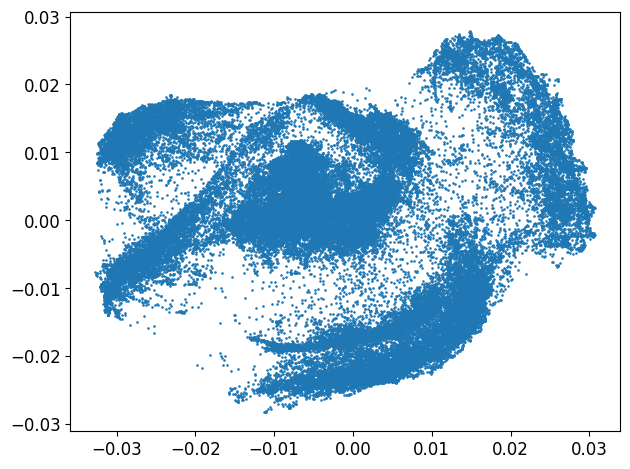

<Axes: >

In [2]:
phate_operator = phate.PHATE(n_components=2, n_jobs=-2, random_state=42)
Y_phate_2d = phate_operator.fit_transform(mnist)
scprep.plot.scatter2d(Y_phate_2d)

In [3]:
num_clusters = 24
indexes, pred = partition_data(mnist, n_partitions=num_clusters, phate_dim=10, n_jobs=-2, seed=42, return_pred=True)

for i in range(0, num_clusters):
    print("Group number:", i, Counter(labels[indexes[i]]))

Calculating PHATE...
  Running PHATE on 70000 observations and 784 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.34 seconds.
    Calculating KNN search...
    Calculated KNN search in 144.22 seconds.
    Calculating affinities...
    Calculated affinities in 0.77 seconds.
  Calculated graph and diffusion operator in 148.39 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 6.96 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.62 seconds.
  Calculated landmark operator in 11.44 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 2.00 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.48 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 202.23 seconds.
Calculated PHATE in 364.56 seconds.
Group number: 0 Counter({4: 2567, 9: 28, 7: 3, 8: 2, 6: 2})
Group number: 1 Counter({5: 1937, 8: 380, 3: 

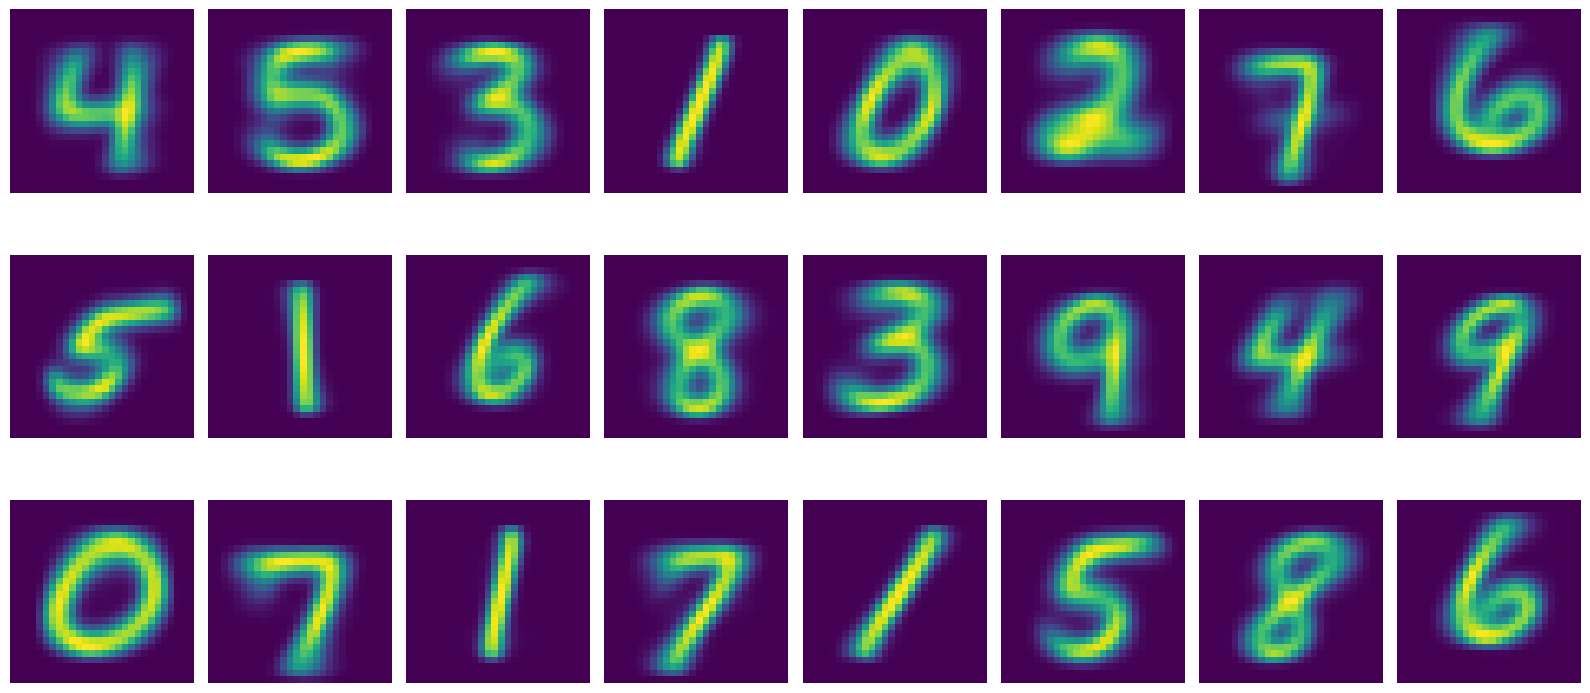

In [4]:
# plot the average pixel in each group using plt.subplots

fig, axes = plt.subplots(3, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    if i < num_clusters:
        ax.imshow(np.mean(mnist[indexes[i]], axis=0).reshape(28, 28))
    ax.axis('off')
plt.tight_layout()

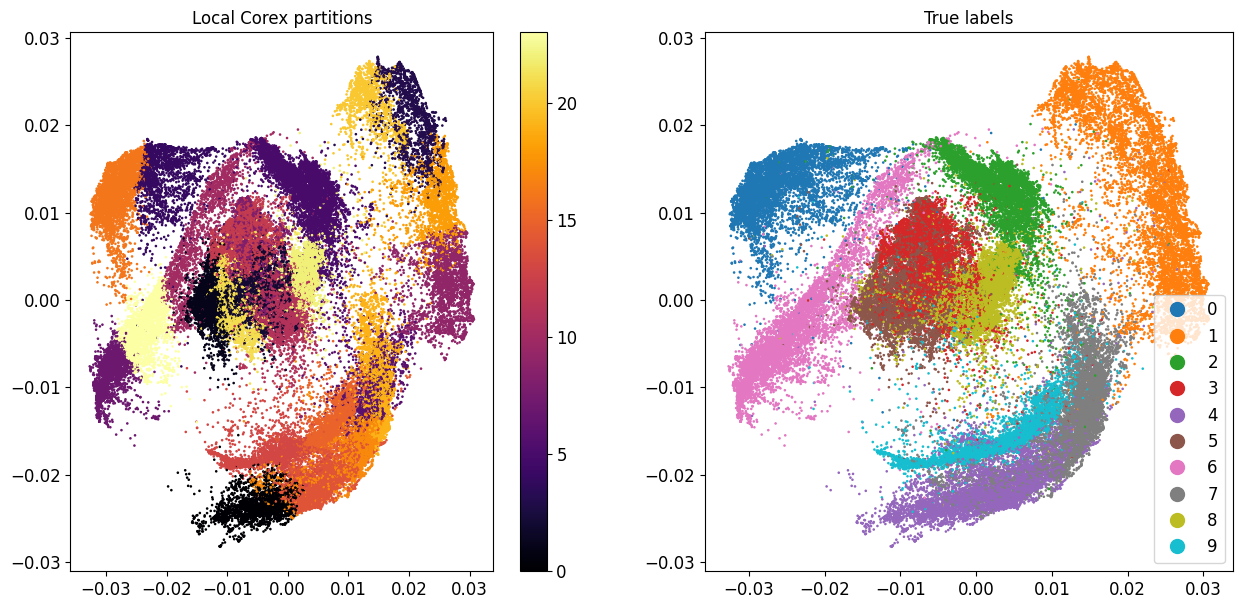

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
scprep.plot.scatter2d(Y_phate_2d, c=pred, ax=axes[0])
axes[0].set_title("Local Corex partitions")
scprep.plot.scatter2d(Y_phate_2d, c=labels, ax=axes[1])
axes[1].set_title("True labels")
plt.show()

In [6]:
model_13 = LinearCorex(n_hidden=20, seed=42)
Y1_0 = model_13.fit_transform(mnist[indexes[13]])

print(model_13.tcs)

[17.946415  13.107114  11.92547   10.6299925  9.923414   8.933206
  8.865484   7.3221173  7.2574778  7.0924463  6.96899    6.6943884
  5.9574957  5.899596   5.8606057  5.5853353  5.3066115  5.246998
  4.6074     4.3792405]


C:\Users\tkerby2\Desktop\Research\Local_CorEx\local_corex\base\linear.py:278: RuntimeWarning: invalid value encountered in log
  m["TC"] = np.sum(np.log(1 + m["Si"])) \
C:\Users\tkerby2\Desktop\Research\Local_CorEx\local_corex\base\linear.py:279: RuntimeWarning: invalid value encountered in log
  - 0.5 * np.sum(np.log(1 + m["Qi-Si^2"])) \
C:\Users\tkerby2\Desktop\Research\Local_CorEx\local_corex\base\linear.py:270: RuntimeWarning: divide by zero encountered in divide
  m["invrho"] = 1. / (1. - m["rho"]**2)
C:\Users\tkerby2\Desktop\Research\Local_CorEx\local_corex\base\linear.py:275: RuntimeWarning: invalid value encountered in subtract
  m["Qi-Si^2"] = np.einsum('ki,ki->i', m["rhoinvrho"], m["Qij"] - m["Si"] * m["rho"])


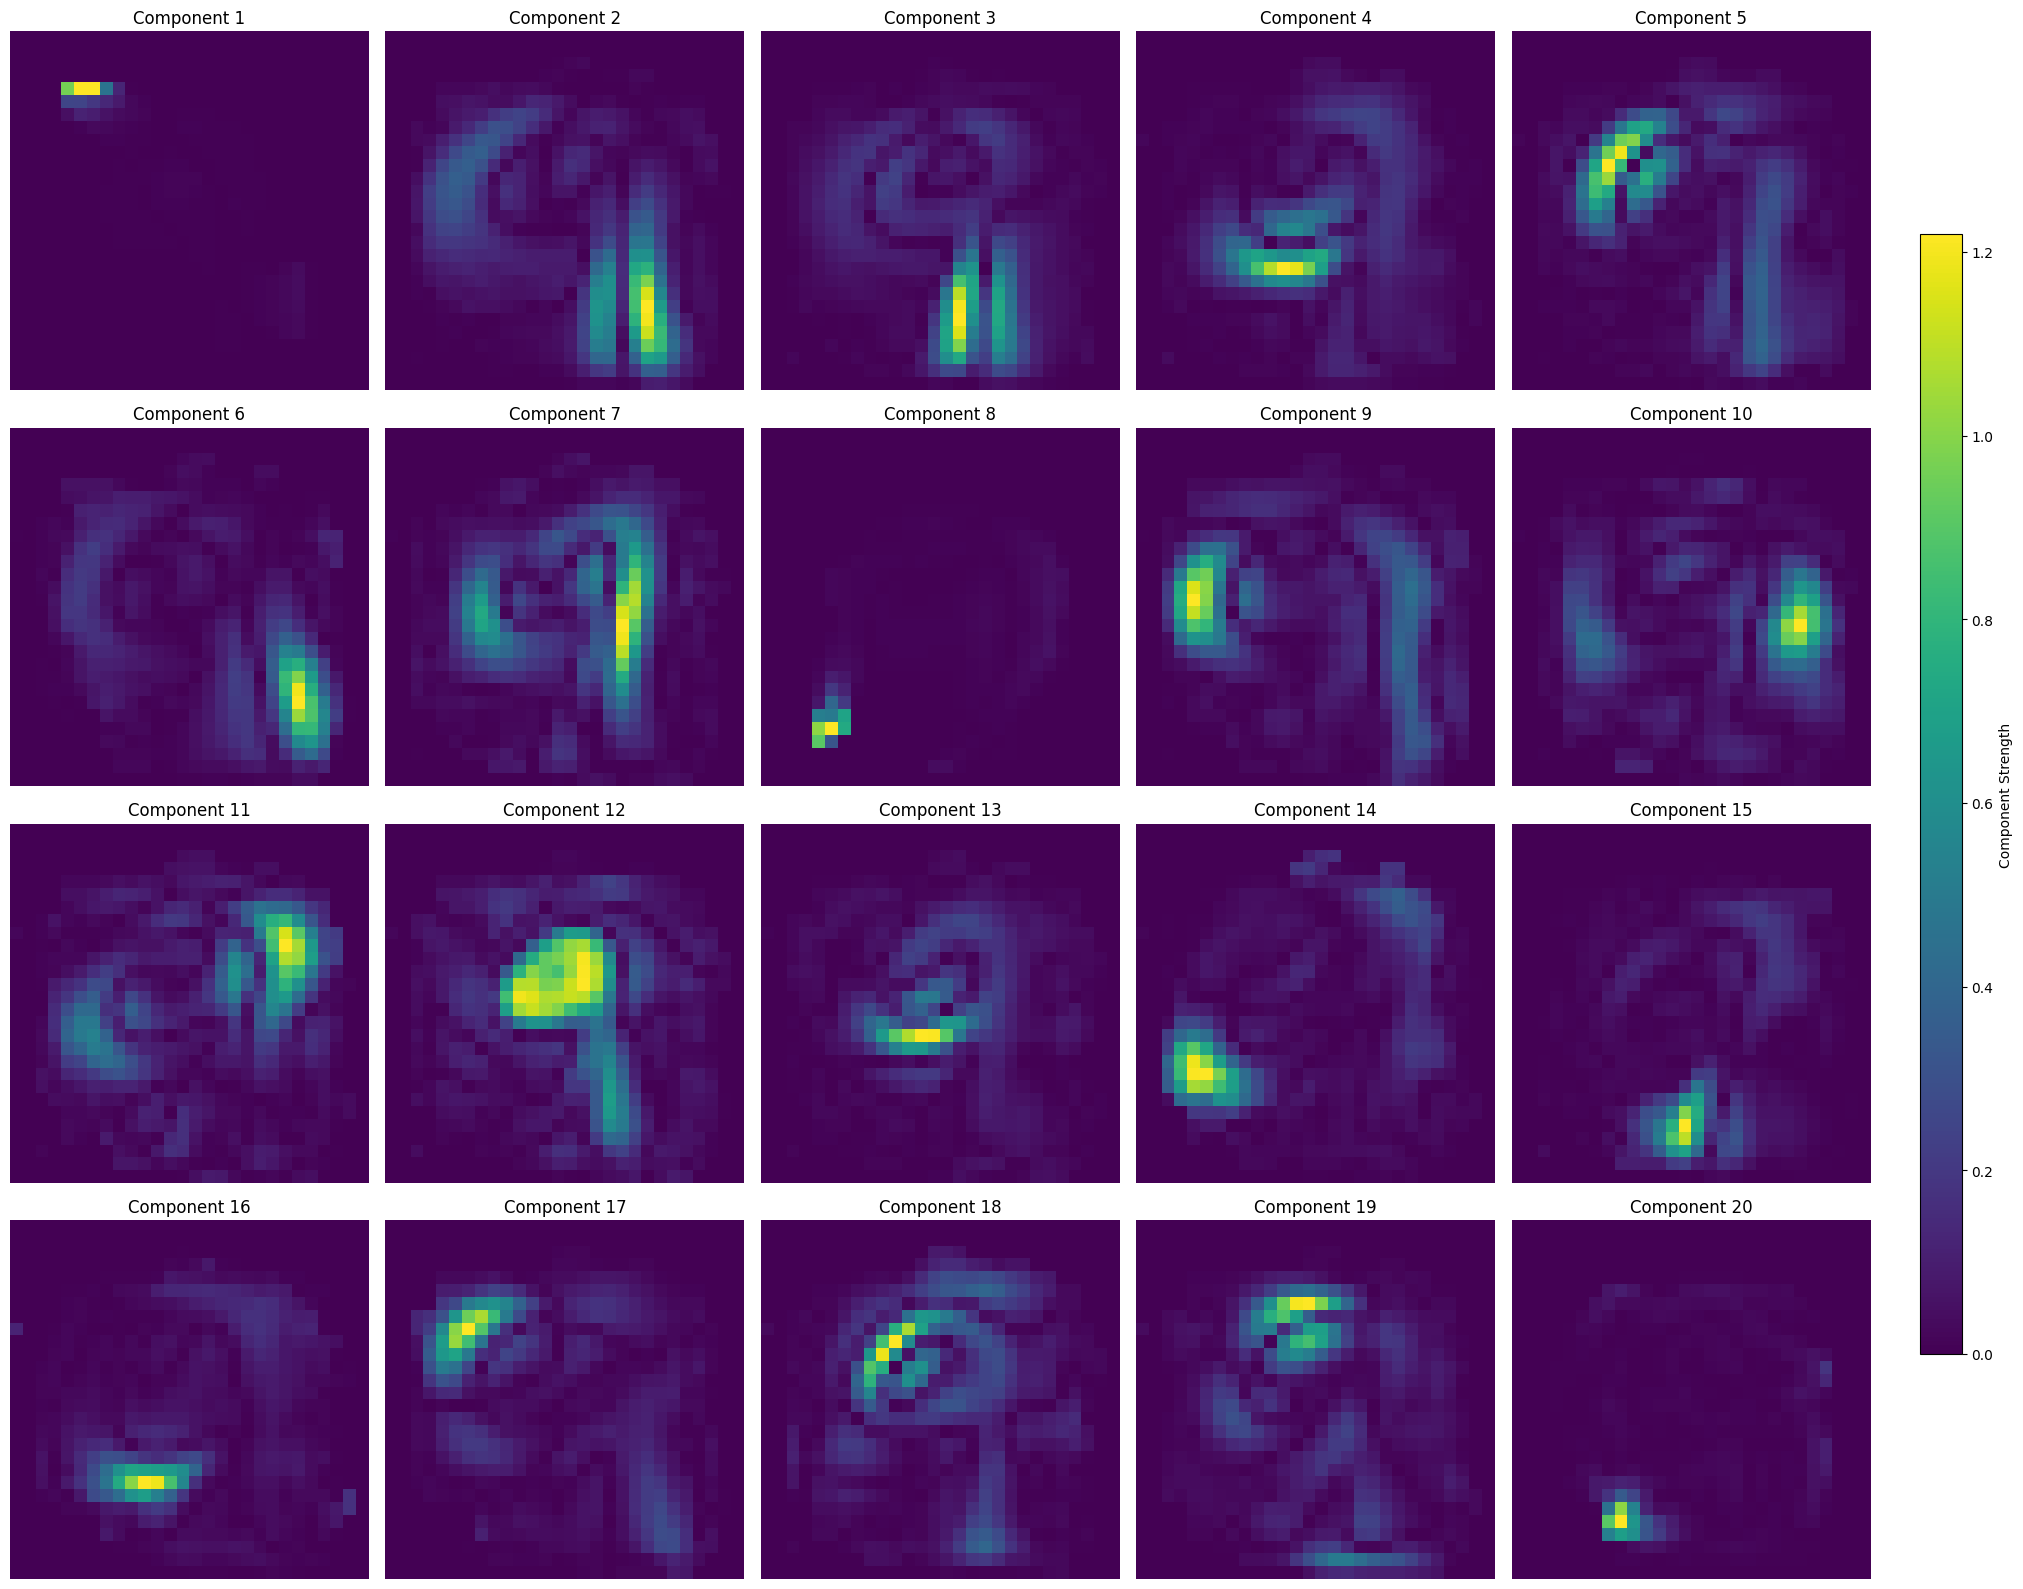

In [7]:
pu.plot_corex_mis_per_component(model_13, n_components=20, n_columns=5)

In [8]:
labels_onehot = np.zeros((len(labels), 10))
labels_onehot[np.arange(len(labels)), labels] = 1

# concatenate mnist array with labels_onehot
mnist_labels = np.concatenate((mnist, labels_onehot), axis=1)
mnist_labels.shape

(70000, 794)

In [9]:
model_13_with_labels = LinearCorex(n_hidden=20, seed=42)


Y1_0 = model_13_with_labels.fit_transform(mnist_labels[indexes[13]])

print(model_13_with_labels.tcs)

[17.348696  12.700601  12.265308  10.73363    9.160281   9.08024
  8.758012   7.6700735  7.3319025  6.8858976  6.8452597  6.6998906
  6.533515   6.265853   6.161606   5.931542   5.7377234  5.370668
  4.4664397  3.2400427]


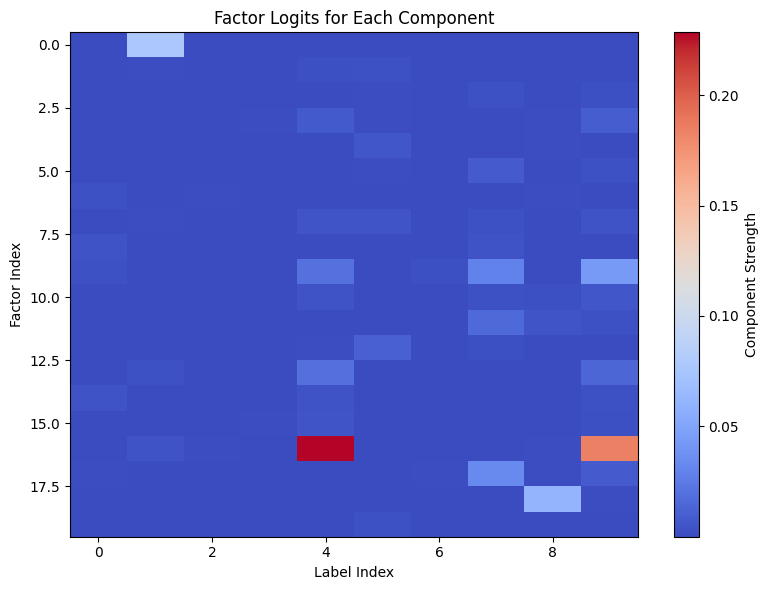

In [10]:
factor_logits = np.concatenate([model_13_with_labels.mis[i][784:] for i in range(20)], axis=0)

plt.figure(figsize=(8, 6))
im = plt.imshow(factor_logits.reshape(20, 10), cmap='coolwarm', aspect='auto')
cbar = plt.colorbar(im)
cbar.set_label('Component Strength')
plt.xlabel('Label Index')
plt.ylabel('Factor Index')
plt.title('Factor Logits for Each Component')
plt.tight_layout()
plt.show()

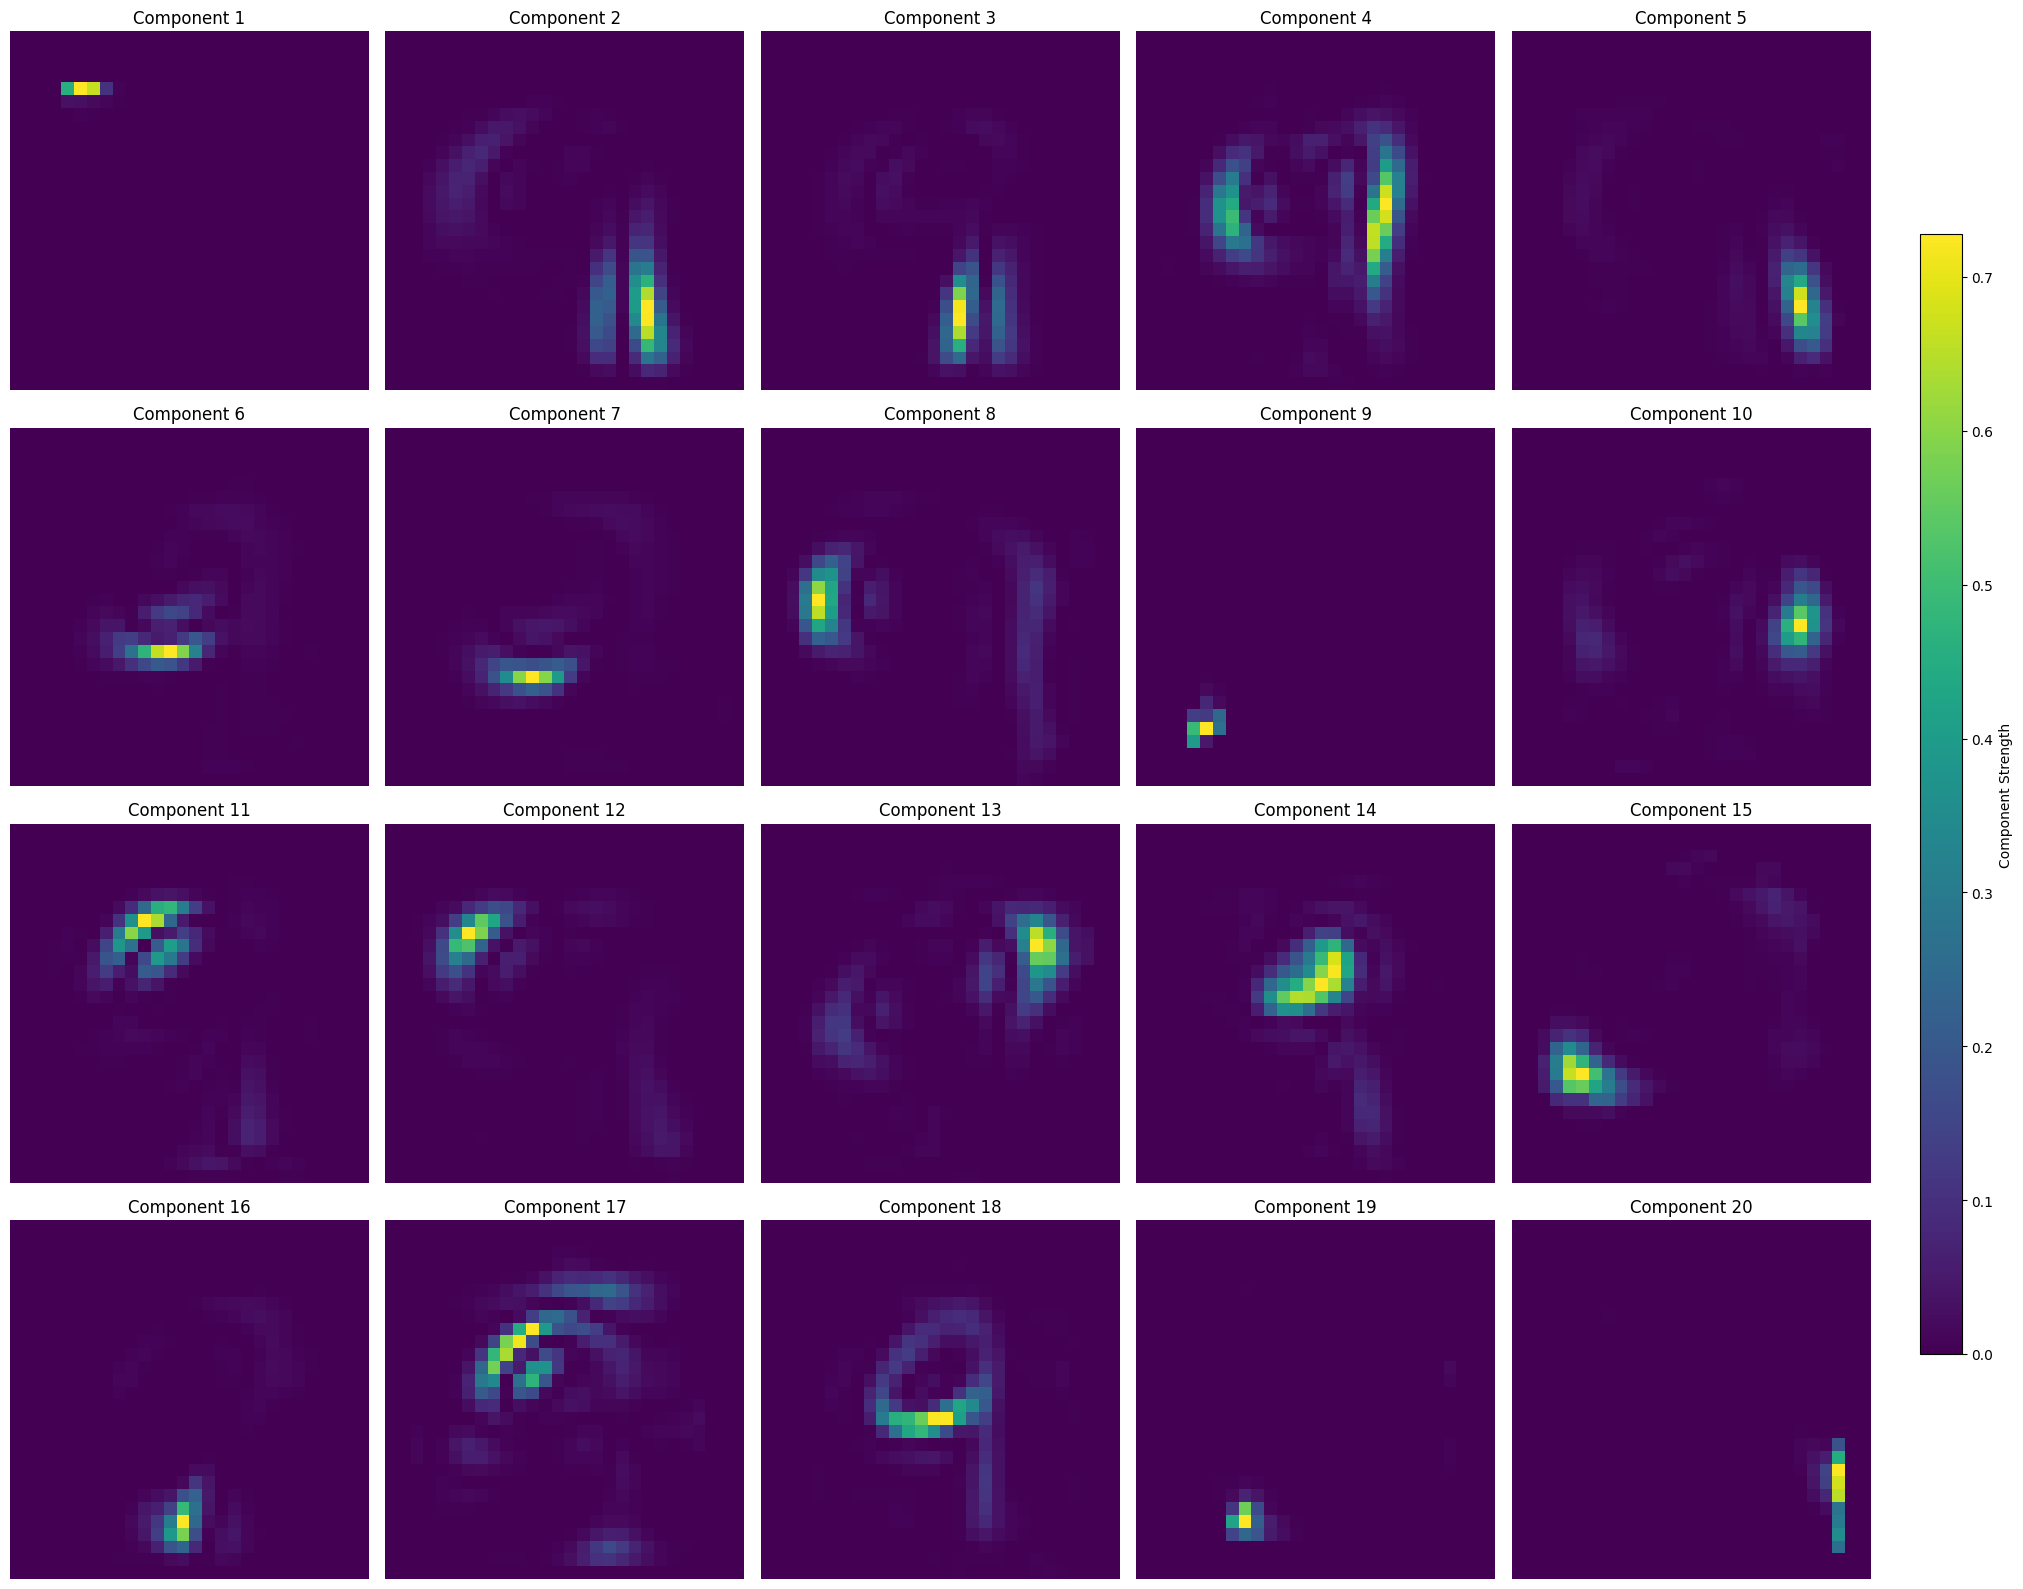

In [11]:
n_components = 20
n_columns = 5
cbar_max = None
component_shape = (28, 28)  # Assuming each component is a 28x28 image
model=model_13_with_labels

n_rows = (n_components + n_columns - 1) // n_columns
fig, axes = plt.subplots(n_rows, n_columns, figsize=(4 * n_columns + 1, 4 * n_rows))

# Compute sqrt(MI) and optionally clip values above cbar_max
# all_components = np.array([np.sqrt(model.mis[i]).reshape(*component_shape) for i in range(n_components)])
all_components = np.array([model.mis[i][:784].reshape(*component_shape) for i in range(n_components)])
vmin = all_components.min()
vmax = all_components.max() if cbar_max is None else cbar_max

# Clip all values above vmax if cbar_max is set
if cbar_max is not None:
    all_components = np.clip(all_components, vmin, cbar_max)

for i in range(n_components):
    ax = axes[i // n_columns, i % n_columns]
    component = all_components[i]
    # im = ax.imshow(component, vmin=vmin, vmax=vmax)
    im = ax.imshow(component)
    ax.set_title(f'Component {i+1}')
    ax.axis('off')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_columns):
    axes[j // n_columns, j % n_columns].axis('off')

plt.tight_layout()
fig.subplots_adjust(right=0.9)

# # Add a colorbar that applies to all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Component Strength')

plt.show()

In [12]:
# Extract factors from both models (excluding label dimensions for model_13_with_labels)
factors_1 = np.array([model_13.mis[i].reshape(component_shape) for i in range(n_components)])
factors_2 = np.array([model_13_with_labels.mis[i][:784].reshape(component_shape) for i in range(n_components)])

# Compute pairwise similarity (using correlation)
def factor_similarity(a, b):
    return np.corrcoef(a.flatten(), b.flatten())[0, 1]

similarity_matrix = np.zeros((n_components, n_components))
for i in range(n_components):
    for j in range(n_components):
        similarity_matrix[i, j] = factor_similarity(factors_1[i], factors_2[j])

# Find best matches
matches = np.argmax(similarity_matrix, axis=1)
match_scores = np.max(similarity_matrix, axis=1)

# Threshold for considering a match (e.g., correlation > 0.9)
threshold = 0.9
unique_in_1 = [i for i, score in enumerate(match_scores) if score < threshold]
unique_in_2 = list(set(range(n_components)) - set(matches[match_scores >= threshold]))

print("Matching pairs (correlation > {:.2f}):".format(threshold))
for i in range(n_components):
    if match_scores[i] >= threshold:
        print(f"model_13 factor {i} <-> model_13_with_labels factor {matches[i]} (corr={match_scores[i]:.2f})")

print("\nUnique factors in model_13:", unique_in_1)
print("Unique factors in model_13_with_labels:", unique_in_2)

Matching pairs (correlation > 0.90):
model_13 factor 0 <-> model_13_with_labels factor 0 (corr=1.00)
model_13 factor 1 <-> model_13_with_labels factor 1 (corr=1.00)
model_13 factor 2 <-> model_13_with_labels factor 2 (corr=1.00)
model_13 factor 5 <-> model_13_with_labels factor 4 (corr=1.00)
model_13 factor 6 <-> model_13_with_labels factor 3 (corr=0.95)
model_13 factor 7 <-> model_13_with_labels factor 8 (corr=1.00)
model_13 factor 8 <-> model_13_with_labels factor 7 (corr=0.99)
model_13 factor 9 <-> model_13_with_labels factor 9 (corr=1.00)
model_13 factor 10 <-> model_13_with_labels factor 12 (corr=0.99)
model_13 factor 11 <-> model_13_with_labels factor 13 (corr=0.93)
model_13 factor 13 <-> model_13_with_labels factor 14 (corr=0.99)
model_13 factor 14 <-> model_13_with_labels factor 15 (corr=1.00)
model_13 factor 16 <-> model_13_with_labels factor 11 (corr=0.96)
model_13 factor 19 <-> model_13_with_labels factor 18 (corr=1.00)

Unique factors in model_13: [3, 4, 12, 15, 17, 18]
Uni

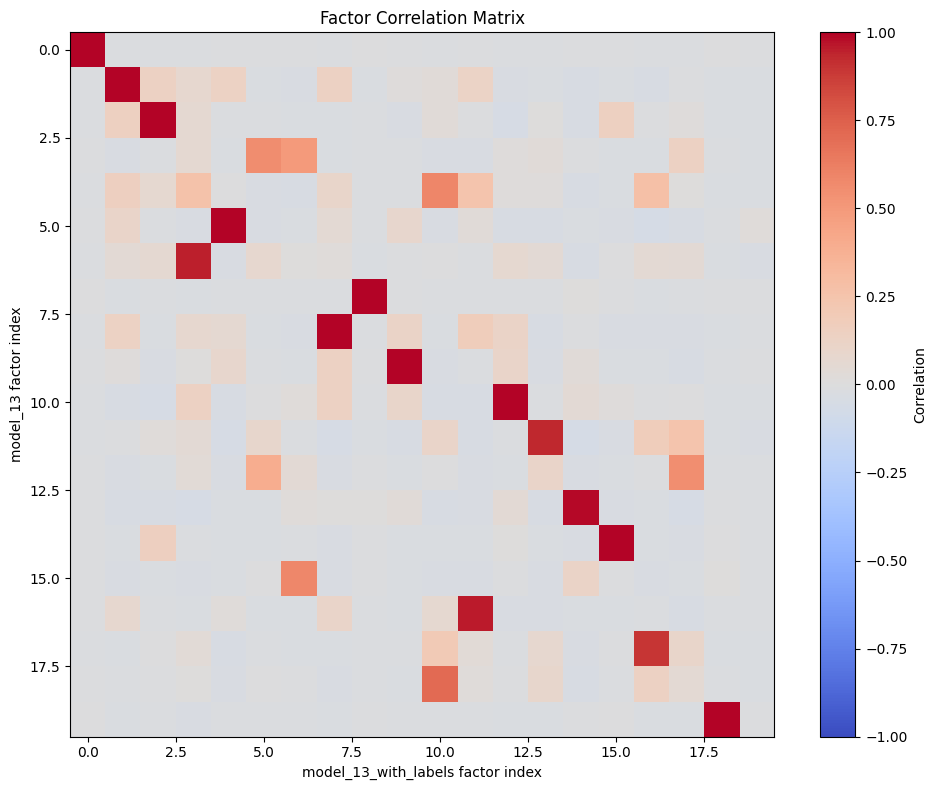

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xlabel('model_13_with_labels factor index')
plt.ylabel('model_13 factor index')
plt.title('Factor Correlation Matrix')
plt.tight_layout()
plt.show()

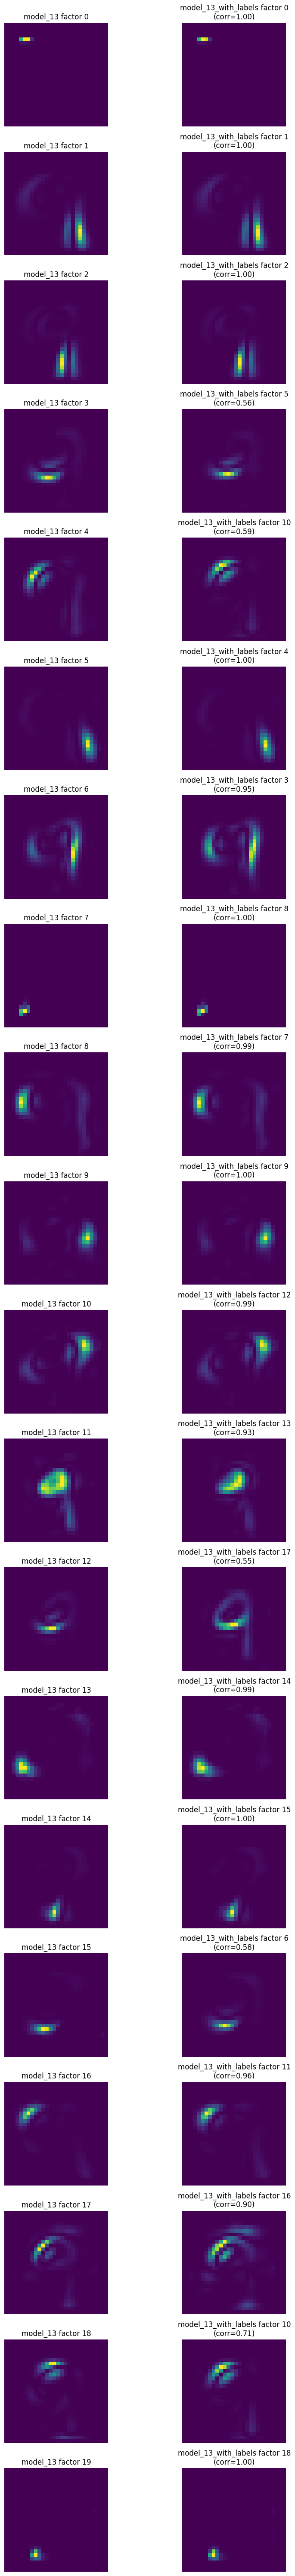

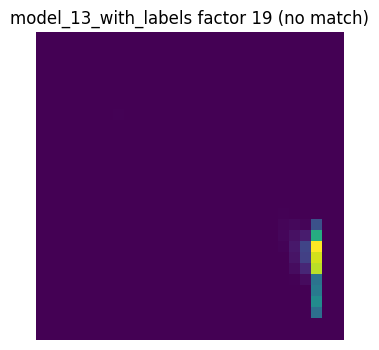

In [14]:
fig, axes = plt.subplots(len(matches), 2, figsize=(10, 3 * len(matches)))
factor_2_inds = set()
for idx, (i1, i2) in enumerate(zip(range(n_components), matches)):
    axes[idx, 0].imshow(factors_1[i1])
    axes[idx, 0].set_title(f"model_13 factor {i1}")
    axes[idx, 0].axis('off')
    axes[idx, 1].imshow(factors_2[i2])
    axes[idx, 1].set_title(f"model_13_with_labels factor {i2}\n(corr={match_scores[i1]:.2f})")
    axes[idx, 1].axis('off')
    factor_2_inds.add(i2)
plt.tight_layout()
plt.show()

for i in range(20):
    if i not in factor_2_inds:
        plt.figure(figsize=(4, 4))
        plt.imshow(factors_2[i])
        plt.title(f"model_13_with_labels factor {i} (no match)")
        plt.axis('off')
        plt.show()

In [15]:
# Extract factors from both models (excluding label dimensions for model_13_with_labels)
factors_2 = np.array([model_13.mis[i].reshape(component_shape) for i in range(n_components)])
factors_1 = np.array([model_13_with_labels.mis[i][:784].reshape(component_shape) for i in range(n_components)])

# Compute pairwise similarity (using correlation)
def factor_similarity(a, b):
    return np.corrcoef(a.flatten(), b.flatten())[0, 1]

similarity_matrix = np.zeros((n_components, n_components))
for i in range(n_components):
    for j in range(n_components):
        similarity_matrix[i, j] = factor_similarity(factors_1[i], factors_2[j])

# Find best matches
matches = np.argmax(similarity_matrix, axis=1)
match_scores = np.max(similarity_matrix, axis=1)

# Threshold for considering a match (e.g., correlation > 0.9)
threshold = 0.9
unique_in_1 = [i for i, score in enumerate(match_scores) if score < threshold]
unique_in_2 = list(set(range(n_components)) - set(matches[match_scores >= threshold]))

print("Matching pairs (correlation > {:.2f}):".format(threshold))
for i in range(n_components):
    if match_scores[i] >= threshold:
        print(f"model_13 factor {i} <-> model_13_with_labels factor {matches[i]} (corr={match_scores[i]:.2f})")

print("\nUnique factors in model_13:", unique_in_1)
print("Unique factors in model_13_with_labels:", unique_in_2)

Matching pairs (correlation > 0.90):
model_13 factor 0 <-> model_13_with_labels factor 0 (corr=1.00)
model_13 factor 1 <-> model_13_with_labels factor 1 (corr=1.00)
model_13 factor 2 <-> model_13_with_labels factor 2 (corr=1.00)
model_13 factor 3 <-> model_13_with_labels factor 6 (corr=0.95)
model_13 factor 4 <-> model_13_with_labels factor 5 (corr=1.00)
model_13 factor 7 <-> model_13_with_labels factor 8 (corr=0.99)
model_13 factor 8 <-> model_13_with_labels factor 7 (corr=1.00)
model_13 factor 9 <-> model_13_with_labels factor 9 (corr=1.00)
model_13 factor 11 <-> model_13_with_labels factor 16 (corr=0.96)
model_13 factor 12 <-> model_13_with_labels factor 10 (corr=0.99)
model_13 factor 13 <-> model_13_with_labels factor 11 (corr=0.93)
model_13 factor 14 <-> model_13_with_labels factor 13 (corr=0.99)
model_13 factor 15 <-> model_13_with_labels factor 14 (corr=1.00)
model_13 factor 18 <-> model_13_with_labels factor 19 (corr=1.00)

Unique factors in model_13: [5, 6, 10, 16, 17, 19]
Uni

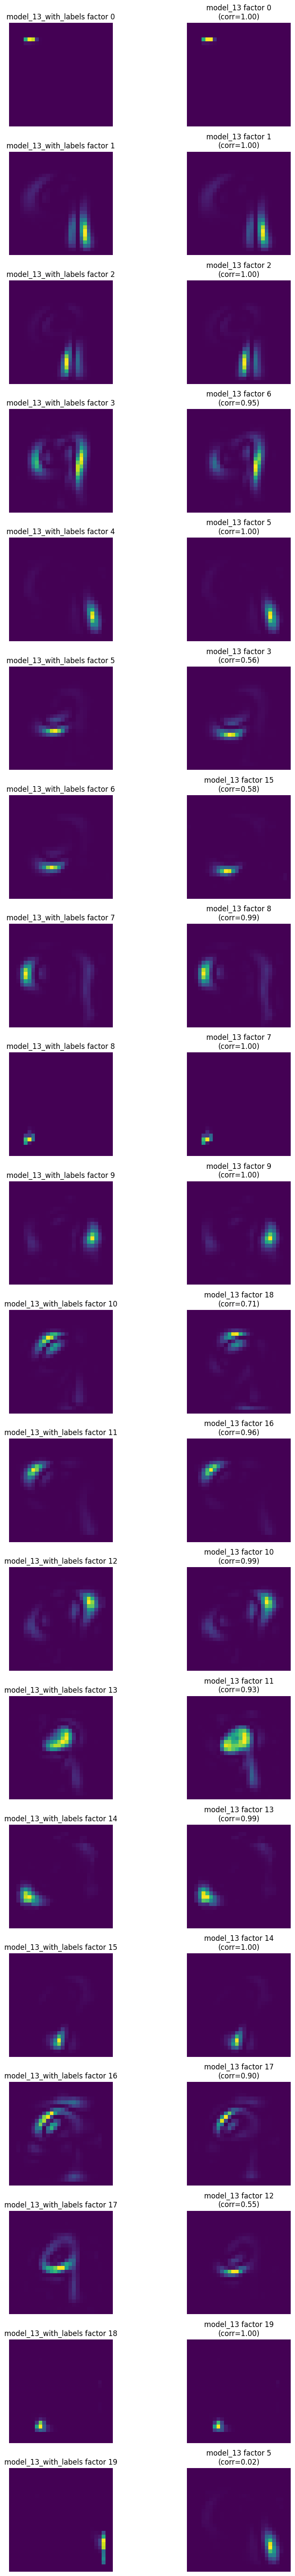

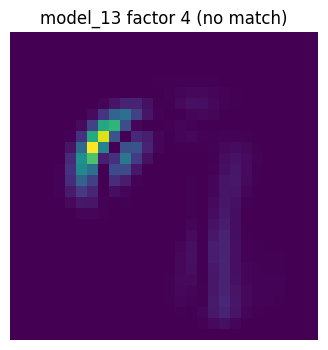

In [16]:
fig, axes = plt.subplots(len(matches), 2, figsize=(10, 3 * len(matches)))
factor_2_inds = set()
for idx, (i1, i2) in enumerate(zip(range(n_components), matches)):
    axes[idx, 0].imshow(factors_1[i1])
    axes[idx, 0].set_title(f"model_13_with_labels factor {i1}")
    axes[idx, 0].axis('off')
    axes[idx, 1].imshow(factors_2[i2])
    axes[idx, 1].set_title(f"model_13 factor {i2}\n(corr={match_scores[i1]:.2f})")
    axes[idx, 1].axis('off')
    factor_2_inds.add(i2)
plt.tight_layout()
plt.show()

for i in range(20):
    if i not in factor_2_inds:
        plt.figure(figsize=(4, 4))
        plt.imshow(factors_2[i])
        plt.title(f"model_13 factor {i} (no match)")
        plt.axis('off')
        plt.show()